In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [31c24e10] + Distributions v0.25.112
  [f27b6e38] + Polynomials v4.0.11
  [10745b16] + Statistics v1.10.0
    Updating `~/Documents/programming/BME-574-2024/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [31c24e10] + Distributions v0.25.112
  [1a297f60] + FillArrays v1.13.0
  [34004b35] + HypergeometricFunctions v0.3.24
  [90014a1f] + PDMats v0.11.31
  [43287f4e] + PtrArrays v1.2.1
  [1fd47b50] + QuadGK v2.11.1
  [79098fc4] + Rmath v0.8.0
  [4c63d2b9] + StatsFuns v1.3.2
  [f50d1b31] + Rmath_jll v0.5.1+0
  [4607b0f0] + SuiteSparse
Precompiling project...
  ✓ Distributions
  ✓ Distributions → DistributionsTestExt
  2 dependencies successfully precompiled in 4 seconds. 214 already preco

In [3]:
using Plots, Distributions, Statistics, Polynomials, Random

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


This chapter is on the concept of least-square fitting of data.  The assumption that we are making here is that each data point that we are measuring is independent of each other and that each data point $y_{i}=f(x_{i},\theta)$ has an error that has been drawn from a normal distribution with zero mean and standard deviation $\sigma_{i}$. $\theta$ represents the parameters of the model $f(x,\theta)$ with which you want to fit the data.
Lets find out what we can say about the likelihood pdf of such data:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \prod_{i}\frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{(y_{i}(x_{i})-f(x_{i},\theta))^2}{2\sigma_{i}^2}\big)$$
Least-square fits are often also called $\chi^2$ fits.  $\chi^2$ is defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$
which simplifies the likelihood to:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$
now let's assume also that the prior distribution for your parameters is flat $P(\theta)=const$.  Then
$$P(\theta \mid \{y_{i}(x_{i})\}) \propto P (\{y_{i}(x_{i})\}\mid \theta)$$
and if you are only interested in the maximum value of the $P(\theta \mid \{y_{i}(x_{i})\})$ then you need to find the minimum value of $\chi^2$.  That is what people mean when they talk about least-square fitting: minimizing $\chi^2$ as a function of $\theta$.

In [4]:
x = collect(0:10)

11-element Vector{Int64}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [31]:
data_std = 3.0
nd = Normal(0, data_std)

Normal{Float64}(μ=0.0, σ=3.0)

In [32]:
y = 3.0 .* x .+ 1.0 .+ rand(nd, length(x))
y_true = 3.0 .* x .+ 1.0

11-element Vector{Float64}:
  1.0
  4.0
  7.0
 10.0
 13.0
 16.0
 19.0
 22.0
 25.0
 28.0
 31.0

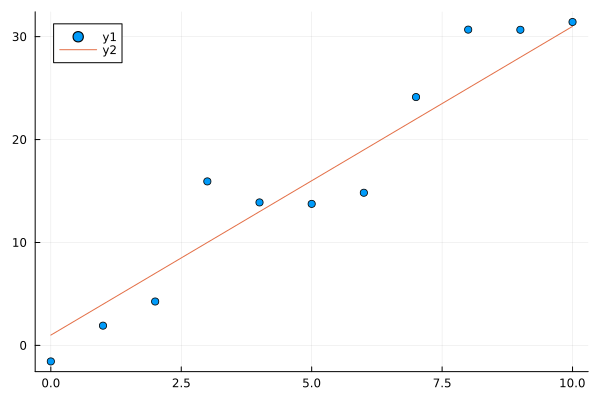

In [33]:
scatter(x,y)
plot!(x,y_true)

In [16]:
Polynomial([1,-1,3])

Polynomial(1 - x + 3*x^2)

In [34]:
line_fit = Polynomials.fit(x,y,1)

Polynomial(-0.7557679496125094 + 3.422728543576489*x)

In [21]:
line_fit(1)

2.097398392532111

In [35]:
y_fit = line_fit.(x)

11-element Vector{Float64}:
 -0.7557679496125094
  2.6669605939639798
  6.089689137540469
  9.512417681116958
 12.935146224693446
 16.357874768269934
 19.780603311846424
 23.203331855422913
 26.626060398999403
 30.04878894257589
 33.47151748615238

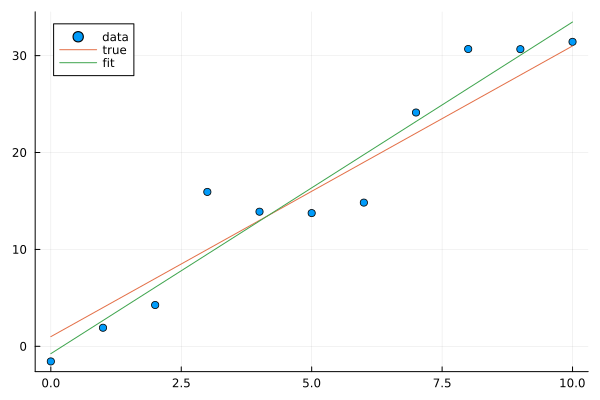

In [36]:
scatter(x,y,label="data")
plot!(x,y_true, label="true")
plot!(x,y_fit, label="fit")

In [37]:
y_par = Polynomials.fit(x,y,2)

Polynomial(-1.2428849380505618 + 3.7474732025351893*x - 0.032474465895870025*x^2)

In [38]:
y_par_fit = y_par.(x)

11-element Vector{Float64}:
 -1.2428849380505618
  2.4721137985887576
  6.122163603436337
  9.707264476492176
 13.227416417756276
 16.682619427228634
 20.072873504909253
 23.398178650798133
 26.65853486489527
 29.85394214720067
 32.984400497714326

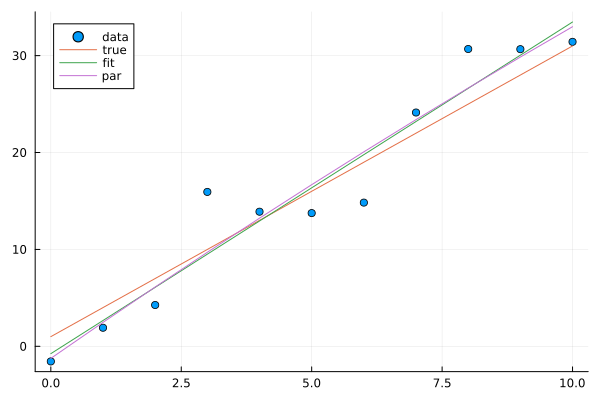

In [39]:
scatter(x,y,label="data")
plot!(x,y_true, label="true")
plot!(x,y_fit, label="fit")
plot!(x,y_par_fit,label="par")

In [40]:
y_poly = Polynomials.fit(x,y,10)

Polynomial(-1.5583165194854587 + 281.6876506034357*x - 722.771213289174*x^2 + 740.9585075130481*x^3 - 405.23049876679187*x^4 + 133.0337262526566*x^5 - 27.55154306532281*x^6 + 3.630579856332556*x^7 - 0.29525545453433555*x^8 + 0.013505009575529175*x^9 - 0.0002656252537752052*x^10)

In [59]:
y_poly_fit = y_poly.(xx)
xx = 0:0.1:10

0.0:0.1:10.0

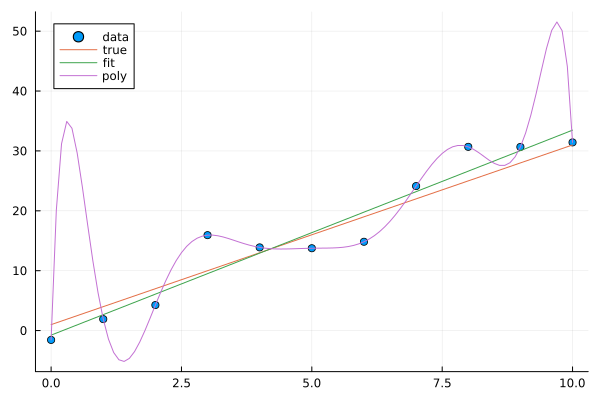

In [60]:
scatter(x,y,label="data")
plot!(x,y_true, label="true")
plot!(x,y_fit, label="fit")
plot!(xx,y_poly_fit,label="poly")

In [66]:
chi2_list = []
for i in 1:10000
    y = 3.0 .* x .+ 1.0 .+ rand(nd, length(x))
    y_fit = Polynomials.fit(x,y,1)
    push!(chi2_list, sum((y .- y_fit.(x)).^2))
end

In [72]:
mean(chi2_list)/data_std^2

8.960399728514687

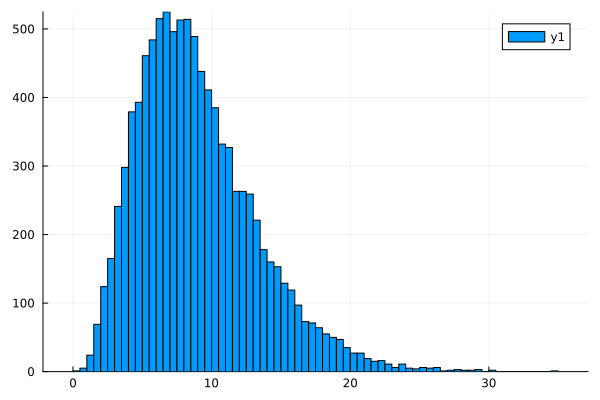

In [73]:
histogram(chi2_list./data_std^2)